<font color='green'>
    <h1 align=center>TP — Manipulations d'images en Python</h1>
          </font>

<h2 align=center>CentraleSupélec-OpenClassrooms Certifiyng Training</h2>

<h3 align=center>Jean Martial Tagro </h3>

### 1. Premières manipulations

In [15]:
from PIL import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# charger l'image
img = Image.open('tigre.jpg')

In [4]:
# Récupérer et afficher la taille de l'image (en pixels)
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

Largeur : 300 px, hauteur : 168 px


Ce résultat signifie que l'image analogique a été découpée en 300 pixels sur la largeur et 168 pixels sur la hauteur pendant l'échantillonnage.

Maintenant, inspectons les valeurs de pixels. L'attribut  Image.mode  nous informe sur le format de pixel utilisé, autrement dit sur la façon dont la quantification a été faite. De plus, la méthode Image.getpixel permet de récupérer l'intensité associée au pixel à une position donnée.

In [5]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : RGB
Valeur du pixel situé en (20,100) : (129, 147, 45)


Nous pouvons également récupérer d'un seul coup les valeurs de tous les pixels de l'image à l'aide de la bibliothèque numpy :

In [6]:
import numpy as np

# Récupérer les valeurs de tous les pixels sous forme d'une matrice
matrice_pixels_values = np.array(img)
matrice_pixels_values

# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(matrice_pixels_values.shape))

Taille de la matrice de pixels : (168, 300, 3)


Il s'agit bien d'une image en couleur avec 3 dimensions; la dernière correspondant au RGB.

In [12]:
# afficher les elements
matrice_pixels_values

array([[[109,  80,  36],
        [130, 101,  57],
        [135, 106,  62],
        ...,
        [ 61,  40,  21],
        [ 59,  41,  21],
        [ 58,  40,  20]],

       [[117,  88,  44],
        [140, 111,  67],
        [146, 117,  73],
        ...,
        [ 51,  32,  15],
        [ 50,  33,  15],
        [ 51,  34,  16]],

       [[124,  95,  51],
        [150, 121,  77],
        [158, 129,  85],
        ...,
        [ 39,  23,   7],
        [ 40,  24,   8],
        [ 40,  24,   8]],

       ...,

       [[132, 107,  77],
        [169, 144, 114],
        [171, 146, 116],
        ...,
        [185, 160, 130],
        [191, 165, 140],
        [149, 123, 100]],

       [[153, 128,  98],
        [193, 168, 138],
        [196, 171, 141],
        ...,
        [194, 169, 139],
        [198, 172, 147],
        [160, 134, 111]],

       [[166, 141, 111],
        [196, 171, 141],
        [190, 165, 135],
        ...,
        [165, 140, 110],
        [168, 142, 117],
        [134, 108,  85]]

#### Attention à l'inversion ligne/colonne et abscisse/ordonnée : 
l'intensité du pixel d'abscisse x et d'ordonnée y
 correspond à l'élément de la matrice situé à la y
 -ème ligne et x
 -ème colonne !  

---

### 2. Histogrammes sur la version noir et blanc de l'image :

![title](tigre_blackwhite.jpg)

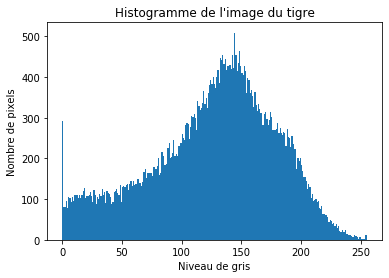

In [22]:
# Charger l'image comme matrice de pixels
img = np.array(Image.open('tigre_blackwhite.jpg'))

# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')
plt.title("Histogramme de l'image du tigre")
plt.show()

Il s'agit d'un outil très important en traitement d'images, car sa modification permet d'ajuster la dynamique des niveaux de gris ou des couleurs dans une image afin de la rendre plus agréable visuellement. Grossièrement, à gauche se situent les pixels noirs, à droite les pixels blancs, et au milieu, toutes les nuances de gris.

#### 2.1 Étirement d’histogrammes

Une première application consiste à corriger la luminosité, ou exposition, de l'image. Analysons la forme des histogrammes pour des images dont l'exposition est mauvaise :
- pour l'image trop sombre, ou <strong>sous-exposée</strong>, la majorité des pixels se situent dans la partie gauche de l'histogramme, vers les valeurs de niveaux de gris faibles
- Inversement, les pixels de l'image trop claire, ou <strong>sur-exposée</strong>, se concentrent dans la partie droite de l'histogramme.

Ainsi, pour corriger les défauts liés à l’exposition d'une image, il suffit simplement d'<strong>étirer son histogramme</strong> : 

In [39]:
from PIL.ImageOps import autocontrast
img_better = autocontrast(Image.open('tigre_blackwhite.jpg'), cutoff=0.5)

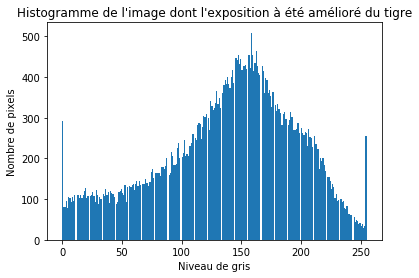

In [40]:
# Charger l'image comme matrice de pixels
img_better = np.array(img_better)

# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img_better.flatten(), bins=range(256))
plt.xlabel('Niveau de gris')
plt.ylabel('Nombre de pixels')
plt.title("Histogramme de l'image dont l'exposition à été amélioré du tigre")
plt.show()

Voir cours, suite des techniques d'amélioration et les transformation géométriques.